In [229]:
import pandas as pd
df = pd.read_csv("Robberies.csv")
df.head()
#Kim Anita

,Months,Robberies
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40
4,1966-05,43


In [230]:
df.isnull().sum()
#Kim Anita

Months       0
Robberies    0
dtype: int64

In [231]:
df.duplicated().sum()
#Kim Anita

0

In [232]:
df.nunique()
#Kim Anita

Months       118
Robberies    101
dtype: int64

In [233]:
df.info()
#Kim Anita

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Months     118 non-null    object
 1   Robberies  118 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [234]:
df.tail()
#Kim Anita

,Months,Robberies
113,1975-06,316
114,1975-07,398
115,1975-08,394
116,1975-09,431
117,1975-10,431


In [235]:
date = pd.date_range(start='1/1/1966', end='11/1/1975', freq='ME')
date
#Kim Anita

DatetimeIndex(['1966-01-31', '1966-02-28', '1966-03-31', '1966-04-30',
               '1966-05-31', '1966-06-30', '1966-07-31', '1966-08-31',
               '1966-09-30', '1966-10-31',
               ...
               '1975-01-31', '1975-02-28', '1975-03-31', '1975-04-30',
               '1975-05-31', '1975-06-30', '1975-07-31', '1975-08-31',
               '1975-09-30', '1975-10-31'],
              dtype='datetime64[ns]', length=118, freq='ME')

In [236]:
df['Months'] = date

df.set_index('Months', inplace=True)
df.head()
#Kim Anita

,Robberies
Months,
1966-01-31,41
1966-02-28,39
1966-03-31,50
1966-04-30,40
1966-05-31,43


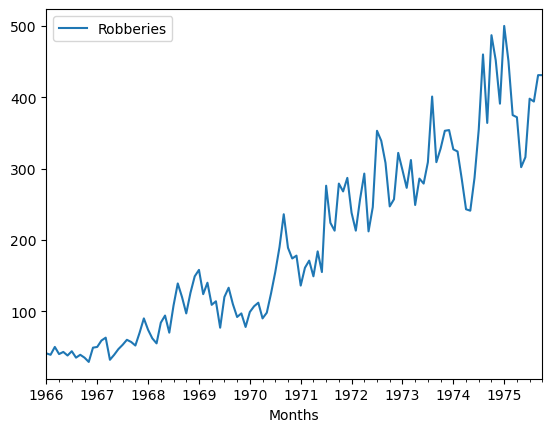

In [237]:
import matplotlib.pyplot as plt
df.plot()
plt.show()
#Kim Anita

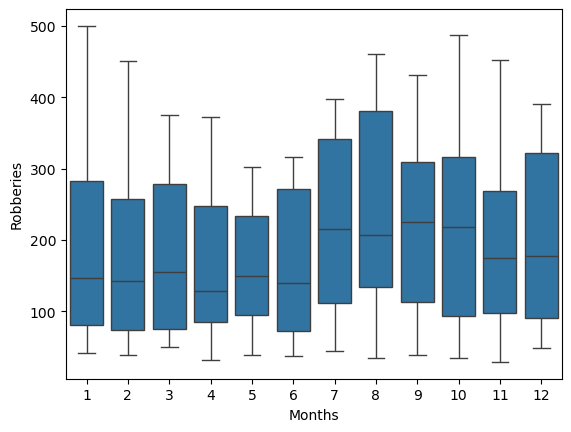

In [238]:
import seaborn as sns
sns.boxplot(x = df.index.month, y =df['Robberies'])
plt.show()
#Kim Anita

<Figure size 5000x2500 with 0 Axes>

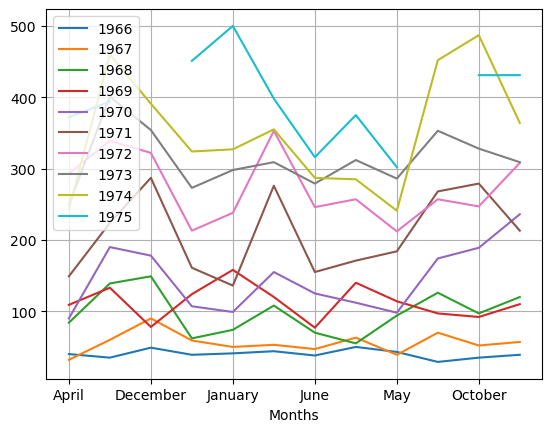

In [239]:

monthly_rabberies_across_years = pd.pivot_table(df,values = 'Robberies',columns = df.index.year, index = df.index.month_name())
plt.figure(figsize=(50, 25))
monthly_rabberies_across_years.plot()

plt.grid()
plt.legend(loc='best');
#Kim Anita

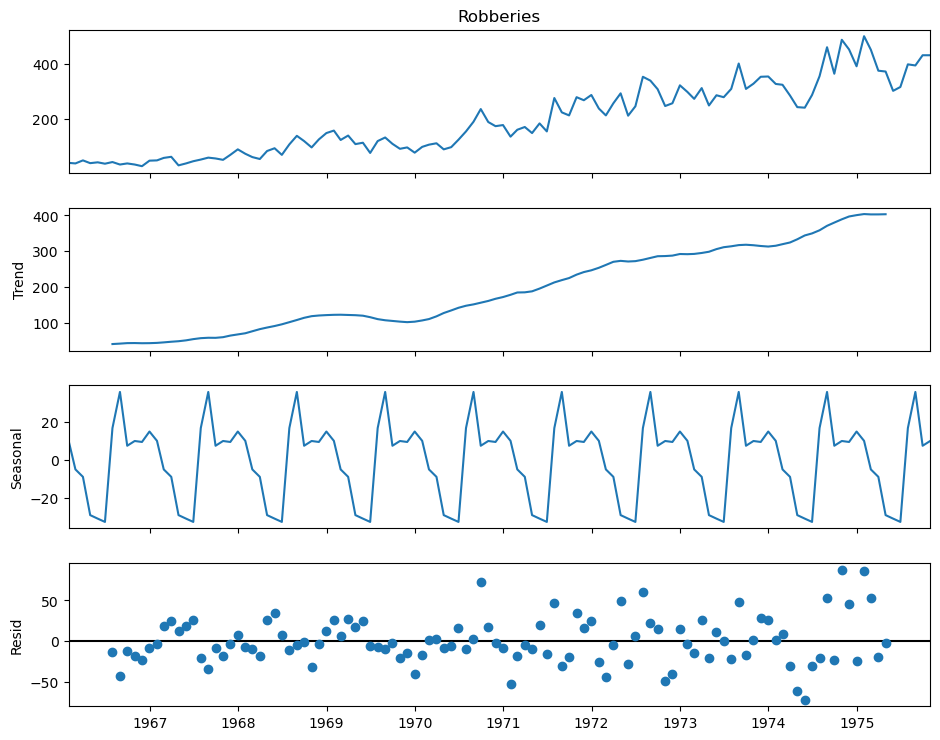

In [240]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df = df.dropna(subset=['Robberies'])
decomposition = seasonal_decompose(df['Robberies'], model='additive', period=12)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()
#Kim Anita

In [241]:
from statsmodels.tsa.stattools import  adfuller

test_result = adfuller(df.values)
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
    print('\t%s: %.5f' % (key, value))
#Kim Anita

ADF Statistic: 1.001102
p-value: 0.994278
Critical Values:
	1%: -3.49360
	5%: -2.88922
	10%: -2.58153


In [242]:
df_diff1 = df.diff(periods=1).dropna()

test_result = adfuller(df_diff1.values)
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
    print('\t%s: %.5f' % (key, value))
    #Kim Anita

ADF Statistic: -7.428564
p-value: 0.000000
Critical Values:
	1%: -3.49360
	5%: -2.88922
	10%: -2.58153


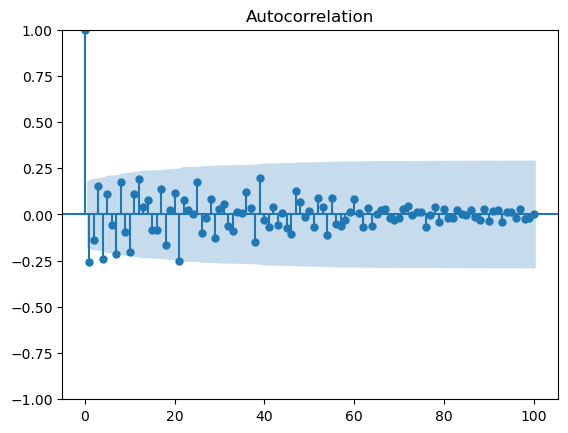

In [243]:
from statsmodels.graphics.tsaplots import  plot_pacf, plot_acf
plot_acf(df_diff1, lags=100);
#Kim Anita

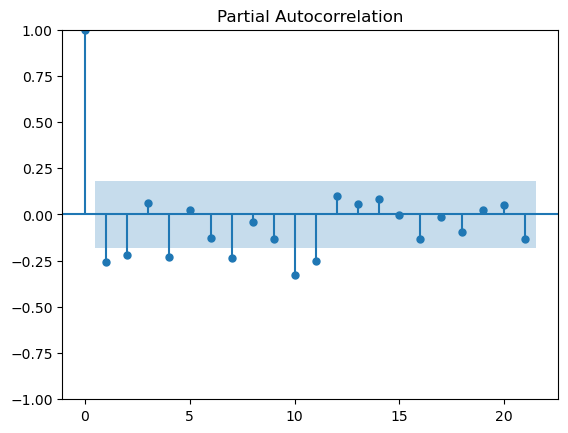

In [244]:
plot_pacf(df_diff1);

In [245]:
from statsmodels.tsa.arima.model import  ARIMA
arima_model = ARIMA(df, order = (1,1,1))
model_fit = arima_model.fit()
print(model_fit.summary())
#Kim Anita

                               SARIMAX Results                                
Dep. Variable:              Robberies   No. Observations:                  118
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -593.971
Date:                Sun, 24 Nov 2024   AIC                           1193.942
Time:                        22:23:08   BIC                           1202.229
Sample:                    01-31-1966   HQIC                          1197.306
                         - 10-31-1975                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4647      0.128      3.633      0.000       0.214       0.715
ma.L1         -0.7825      0.091     -8.560      0.000      -0.962      -0.603
sigma2      1499.6049    145.853     10.282      0.0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [246]:
arima_forecast = model_fit.forecast(steps = 12)
#Kim Anita

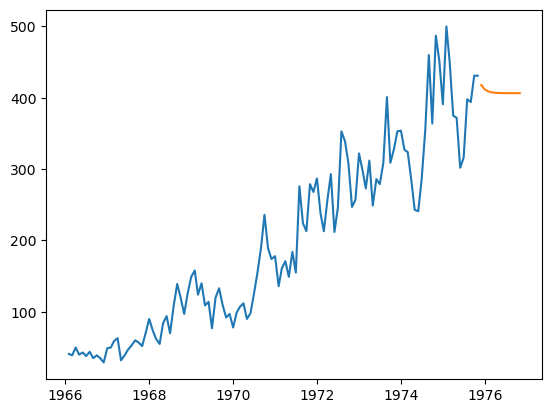

In [247]:
plt.plot(df, label='Train')
plt.plot(arima_forecast, label='Forecast')
#Kim Anita

In [248]:
import numpy as np
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, root_mean_squared_error
rmse_arima = root_mean_squared_error(df.Robberies, model_fit.fittedvalues)
mae_arima = mean_absolute_error(df.Robberies, model_fit.fittedvalues)
mape_arima = (abs((df.Robberies - model_fit.fittedvalues) / df.Robberies).mean()) * 100

print(f"ARIMA:\n MAE: {mae_arima} \n RMSE: {rmse_arima} \n MAPE: {mape_arima}\n")
#Kim Anita

ARIMA:
 MAE: 27.446953285798177 
 RMSE: 38.7470908120798 
 MAPE: 15.883328100725343



/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                Robberies   No. Observations:                  118
Model:             ExponentialSmoothing   SSE                         130171.600
Optimized:                         True   AIC                            858.699
Trend:                         Additive   BIC                            903.030
Seasonal:                      Additive   AICC                           865.608
Seasonal Periods:                    12   Date:                 Sun, 24 Nov 2024
Box-Cox:                          False   Time:                         22:23:08
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5074133                alpha                 True
smoothing_trend          

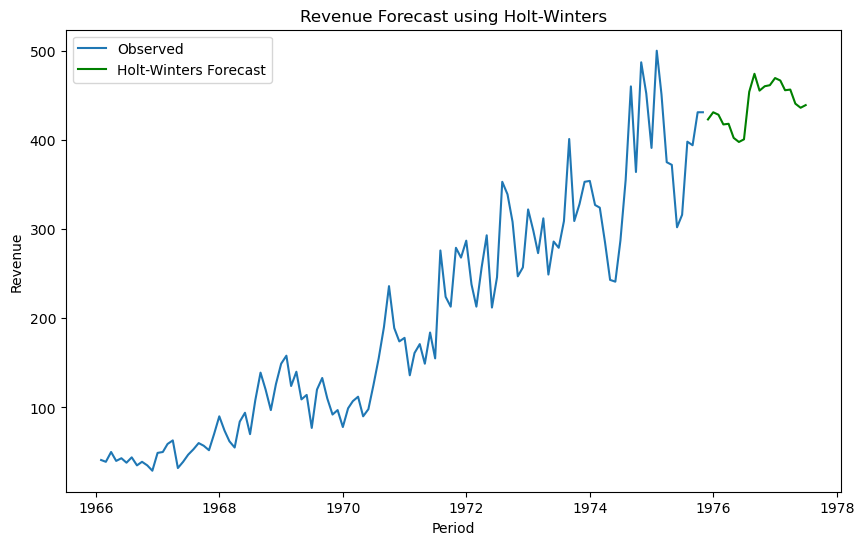

In [249]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(df['Robberies'],trend='add', seasonal='add', seasonal_periods=12).fit()

print(hw_model.summary())

hw_forecast = hw_model.forecast(steps=20)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Robberies'], label='Observed')
plt.plot(pd.date_range(df.index[-1], periods=20+1, freq='ME')[1:], hw_forecast, label='Holt-Winters Forecast', color='green')
plt.title('Revenue Forecast using Holt-Winters')
plt.xlabel('Period')
plt.ylabel('Revenue')
plt.legend()
plt.show()
#Kim Anita

In [250]:
mae_hw_add = root_mean_squared_error(df['Robberies'], hw_model.fittedvalues)
rmse_hw_add = root_mean_squared_error(df['Robberies'], hw_model.fittedvalues)
mape_hw_add = (abs((df['Robberies'] - hw_model.fittedvalues) / df['Robberies']).mean()) * 100
print(f"Holt-Winters Additive: \n MAE: {mae_hw_add} \n RMSE: {rmse_hw_add} \n MAPE: {mape_hw_add}\n")
#Kim Anita

Holt-Winters Additive: 
 MAE: 33.21368923103622 
 RMSE: 33.21368923103622 
 MAPE: 17.394929138122826



/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                Robberies   No. Observations:                  118
Model:             ExponentialSmoothing   SSE                         130171.600
Optimized:                         True   AIC                            858.699
Trend:                         Additive   BIC                            903.030
Seasonal:                      Additive   AICC                           865.608
Seasonal Periods:                    12   Date:                 Sun, 24 Nov 2024
Box-Cox:                          False   Time:                         22:23:08
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5074133                alpha                 True
smoothing_trend          

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


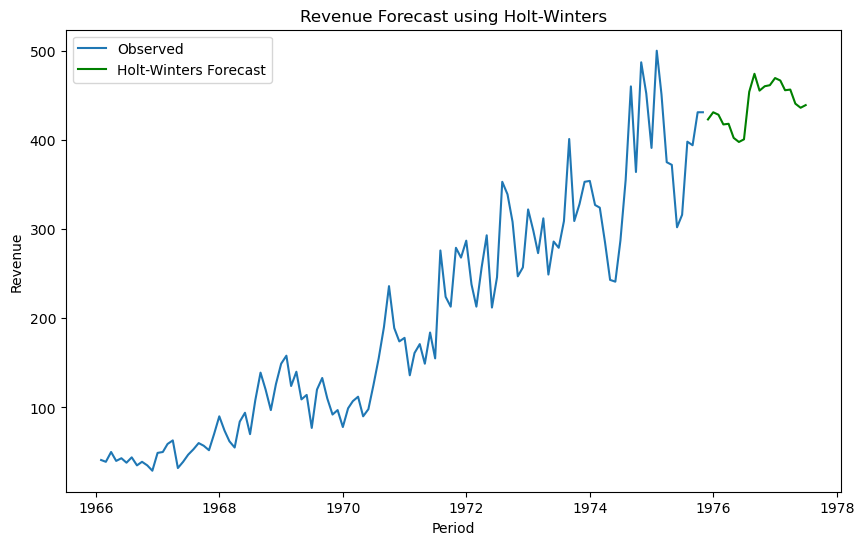

In [251]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model_mul = ExponentialSmoothing(df['Robberies'],trend='mul', seasonal='mul', seasonal_periods=12).fit()

print(hw_model.summary())

hw_forecast_mul = hw_model.forecast(steps=20)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Robberies'], label='Observed')
plt.plot(pd.date_range(df.index[-1], periods=20+1, freq='ME')[1:], hw_forecast_mul, label='Holt-Winters Forecast', color='green')
plt.title('Revenue Forecast using Holt-Winters')
plt.xlabel('Period')
plt.ylabel('Revenue')
plt.legend()
plt.show()
#Kim Anita

In [252]:
mae_hw_mul = mean_absolute_error(df['Robberies'], hw_model_mul.fittedvalues)
rmse_hw_mul = root_mean_squared_error(df['Robberies'], hw_model_mul.fittedvalues)
mape_hw_mul = (abs((df['Robberies'] - hw_model_mul.fittedvalues) / df['Robberies']).mean()) * 100
print(f"Holt-Winters Multiplicative: \n MAE: {mae_hw_mul}\n RMSE: {rmse_hw_mul}\n MAPE: {mape_hw_mul}\n")
#Kim Anita 

Holt-Winters Multiplicative: 
 MAE: 25.447686782725853
 RMSE: 33.358560186297325
 MAPE: 16.088236813763082

